In [1]:
# ========================================
# ANALYSE EXPLORATOIRE DU BITCOIN
# Données historiques OHLCV (2012-2021)
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12

print("✅ Bibliothèques importées avec succès!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn version: {sns.__version__}")


Matplotlib is building the font cache; this may take a moment.


✅ Bibliothèques importées avec succès!
📊 Pandas version: 2.3.3
📈 Matplotlib version: 3.10.7
🎨 Seaborn version: 0.13.2


In [2]:
# ========================================
# CHARGEMENT ET INSPECTION DES DONNÉES
# ========================================

# Charger les données
print("🔄 Chargement des données en cours...")
df = pd.read_csv('../data/btcusd_1-min_data.csv')

print(f"✅ Données chargées avec succès!")
print(f"📏 Nombre de lignes : {len(df):,}")
print(f"📊 Nombre de colonnes : {len(df.columns)}")
print(f"💾 Taille en mémoire : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Afficher les premières lignes
print("\n" + "="*80)
print("APERÇU DES DONNÉES (10 premières lignes)")
print("="*80)
df.head(10)


🔄 Chargement des données en cours...
✅ Données chargées avec succès!
📏 Nombre de lignes : 7,317,759
📊 Nombre de colonnes : 6
💾 Taille en mémoire : 334.98 MB

APERÇU DES DONNÉES (10 premières lignes)


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0
5,1.325412e+09,4.58,4.58,4.58,4.58,0.0
6,1.325412e+09,4.58,4.58,4.58,4.58,0.0
7,1.325412e+09,4.58,4.58,4.58,4.58,0.0
8,1.325413e+09,4.58,4.58,4.58,4.58,0.0
9,1.325413e+09,4.58,4.58,4.58,4.58,0.0


In [3]:
# ========================================
# INFORMATIONS DÉTAILLÉES SUR LES COLONNES
# ========================================

print("="*80)
print("INFORMATIONS SUR LE DATASET")
print("="*80)
df.info()

print("\n" + "="*80)
print("STATISTIQUES DESCRIPTIVES")
print("="*80)
df.describe()


INFORMATIONS SUR LE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317759 entries, 0 to 7317758
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 335.0 MB

STATISTIQUES DESCRIPTIVES


,Timestamp,Open,High,Low,Close,Volume
count,7.317759e+06,7.317759e+06,7.317759e+06,7.317759e+06,7.317759e+06,7.317759e+06
mean,1.544948e+09,2.124984e+04,2.125747e+04,2.124200e+04,2.124985e+04,5.128479e+00
std,1.267532e+08,2.992120e+04,2.992935e+04,2.991293e+04,2.992120e+04,2.206739e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.435178e+09,4.430000e+02,4.431400e+02,4.428800e+02,4.430000e+02,1.959880e-02
50%,1.544945e+09,7.280770e+03,7.285000e+03,7.276340e+03,7.280650e+03,4.481621e-01
75%,1.654711e+09,3.066300e+04,3.067300e+04,3.065317e+04,3.066301e+04,2.897836e+00
max,1.764547e+09,1.262020e+05,1.262720e+05,1.261580e+05,1.262020e+05,5.853852e+03


ANALYSE DES VALEURS MANQUANTES
  Colonne  Valeurs manquantes  Pourcentage (%)
Timestamp                   0              0.0
     Open                   0              0.0
     High                   0              0.0
      Low                   0              0.0
    Close                   0              0.0
   Volume                   0              0.0


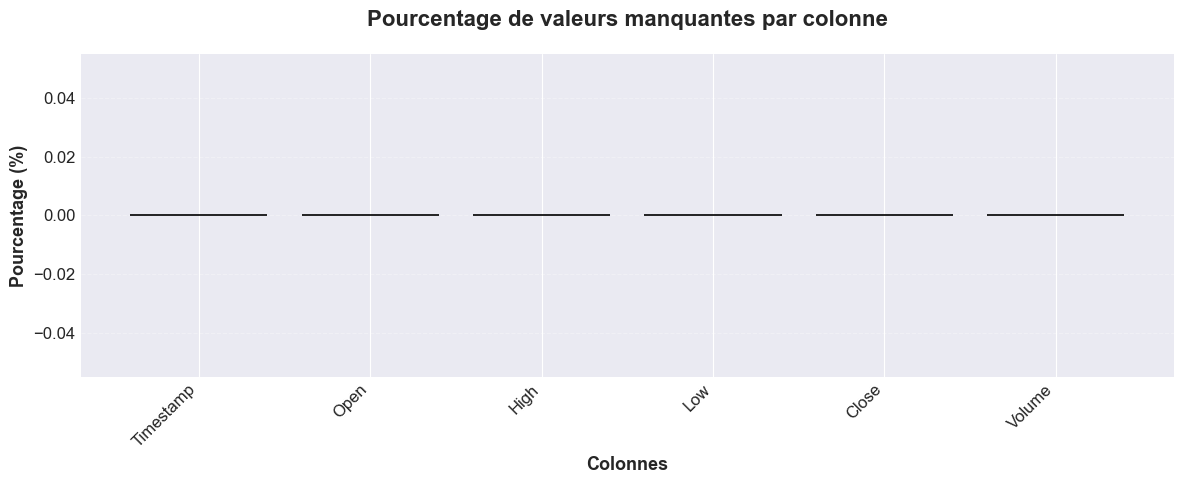


📊 Graphique sauvegardé dans : reports/missing_values.png


In [4]:
# ========================================
# ANALYSE DES VALEURS MANQUANTES
# ========================================

print("="*80)
print("ANALYSE DES VALEURS MANQUANTES")
print("="*80)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs manquantes': missing.values,
    'Pourcentage (%)': missing_pct.values
})

print(missing_df.to_string(index=False))

# Visualisation
plt.figure(figsize=(12, 5))
bars = plt.bar(missing_df['Colonne'], missing_df['Pourcentage (%)'], color='coral', edgecolor='black', linewidth=1.2)
plt.title('Pourcentage de valeurs manquantes par colonne', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Colonnes', fontsize=13, fontweight='bold')
plt.ylabel('Pourcentage (%)', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Graphique sauvegardé dans : reports/missing_values.png")


In [5]:
# ========================================
# VÉRIFICATION DES DOUBLONS
# ========================================

duplicates = df.duplicated().sum()
duplicate_timestamps = df.duplicated(subset=['Timestamp']).sum()

print(f"🔍 Nombre de lignes complètement dupliquées : {duplicates:,}")
print(f"🔍 Nombre de Timestamps dupliqués : {duplicate_timestamps:,}")

if duplicates > 0:
    print(f"⚠️ {duplicates:,} lignes dupliquées détectées ({(duplicates/len(df)*100):.2f}%)")
else:
    print("✅ Aucun doublon détecté")


🔍 Nombre de lignes complètement dupliquées : 0
🔍 Nombre de Timestamps dupliqués : 0
✅ Aucun doublon détecté


In [6]:
# ========================================
# CONVERSION DU TIMESTAMP ET CRÉATION DE VARIABLES TEMPORELLES
# ========================================

print("🔄 Conversion du Timestamp en cours...")

# Convertir le Timestamp Unix en datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df = df.sort_values('Timestamp').reset_index(drop=True)

# Créer des colonnes temporelles utiles
df['Date'] = df['Timestamp'].dt.date
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['DayName'] = df['Timestamp'].dt.day_name()
df['MonthName'] = df['Timestamp'].dt.month_name()

print("✅ Conversion terminée!")
print(f"\n📅 Période couverte : {df['Timestamp'].min()} à {df['Timestamp'].max()}")
print(f"⏱️ Durée totale : {(df['Timestamp'].max() - df['Timestamp'].min()).days:,} jours")
print(f"📊 Soit environ {(df['Timestamp'].max() - df['Timestamp'].min()).days / 365.25:.1f} années")

# Afficher un aperçu avec les nouvelles colonnes
print("\n" + "="*80)
print("APERÇU AVEC LES COLONNES TEMPORELLES")
print("="*80)
df[['Timestamp', 'Date', 'Year', 'Month', 'Hour', 'DayName', 'Open', 'High', 'Low', 'Close', 'Volume']].head(10)


🔄 Conversion du Timestamp en cours...
✅ Conversion terminée!

📅 Période couverte : 2012-01-01 10:01:00 à 2025-11-30 23:59:00
⏱️ Durée totale : 5,082 jours
📊 Soit environ 13.9 années

APERÇU AVEC LES COLONNES TEMPORELLES


,Timestamp,Date,Year,Month,Hour,DayName,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
5,2012-01-01 10:06:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
6,2012-01-01 10:07:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
7,2012-01-01 10:08:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
8,2012-01-01 10:09:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0
9,2012-01-01 10:10:00,2012-01-01,2012,1,10,Sunday,4.58,4.58,4.58,4.58,0.0


In [7]:
# ========================================
# ANALYSE DES SAUTS TEMPORELS
# ========================================

# Calculer les différences de temps entre chaque ligne
df['Time_diff'] = df['Timestamp'].diff()

# Identifier les sauts supérieurs à 2 minutes
large_gaps = df[df['Time_diff'] > pd.Timedelta('2min')].copy()

print("="*80)
print("ANALYSE DES SAUTS TEMPORELS")
print("="*80)
print(f"⚠️ Nombre de sauts temporels > 2 minutes : {len(large_gaps):,}")
print(f"📊 Pourcentage : {(len(large_gaps) / len(df)) * 100:.4f}%")

if len(large_gaps) > 0:
    print("\n🔍 Les 10 plus grands sauts temporels :")
    top_gaps = large_gaps.nlargest(10, 'Time_diff')[['Timestamp', 'Time_diff']]
    print(top_gaps.to_string())
    
    # Statistiques sur les sauts
    print(f"\n📈 Saut moyen : {large_gaps['Time_diff'].mean()}")
    print(f"📈 Saut médian : {large_gaps['Time_diff'].median()}")
    print(f"📈 Saut maximum : {large_gaps['Time_diff'].max()}")
else:
    print("✅ Aucun saut temporel significatif détecté")

# Supprimer la colonne temporaire
df = df.drop('Time_diff', axis=1)


ANALYSE DES SAUTS TEMPORELS
⚠️ Nombre de sauts temporels > 2 minutes : 1
📊 Pourcentage : 0.0000%

🔍 Les 10 plus grands sauts temporels :
                  Timestamp       Time_diff
6943080 2025-03-15 19:21:00 0 days 19:21:00

📈 Saut moyen : 0 days 19:21:00
📈 Saut médian : 0 days 19:21:00
📈 Saut maximum : 0 days 19:21:00


In [8]:
# ========================================
# AGRÉGATION JOURNALIÈRE
# ========================================

print("🔄 Création des agrégations journalières...")

df_daily = df.groupby(df['Timestamp'].dt.date).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

df_daily.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df_daily['Date'] = pd.to_datetime(df_daily['Date'])

# Calculer les rendements et la volatilité
df_daily['Daily_Return'] = df_daily['Close'].pct_change()
df_daily['Daily_Return_Pct'] = df_daily['Daily_Return'] * 100
df_daily['Volatility_30d'] = df_daily['Daily_Return'].rolling(window=30).std()
df_daily['Price_Change'] = df_daily['Close'].diff()
df_daily['Range'] = df_daily['High'] - df_daily['Low']

print("✅ Agrégation journalière terminée!")
print(f"📊 Nombre de jours : {len(df_daily):,}")
print(f"\n📈 Prix de départ (2012) : ${df_daily['Open'].iloc[0]:.2f}")
print(f"📈 Prix actuel (2025) : ${df_daily['Close'].iloc[-1]:,.2f}")
print(f"📈 Variation totale : {((df_daily['Close'].iloc[-1] - df_daily['Open'].iloc[0]) / df_daily['Open'].iloc[0] * 100):,.2f}%")

print("\n" + "="*80)
print("APERÇU DES DONNÉES JOURNALIÈRES")
print("="*80)
df_daily.head(10)


🔄 Création des agrégations journalières...
✅ Agrégation journalière terminée!
📊 Nombre de jours : 5,083

📈 Prix de départ (2012) : $4.58
📈 Prix actuel (2025) : $90,382.00
📈 Variation totale : 1,973,306.11%

APERÇU DES DONNÉES JOURNALIÈRES


,Date,Open,High,Low,Close,Volume,Daily_Return,Daily_Return_Pct,Volatility_30d,Price_Change,Range
0,2012-01-01,4.58,4.84,4.58,4.84,10.000000,NaN,NaN,NaN,NaN,0.26
1,2012-01-02,4.84,5.00,4.84,5.00,10.100000,0.033058,3.305785,NaN,0.16,0.16
2,2012-01-03,5.00,5.32,5.00,5.29,107.085281,0.058000,5.800000,NaN,0.29,0.32
3,2012-01-04,5.29,5.57,4.93,5.57,107.233260,0.052930,5.293006,NaN,0.28,0.64
4,2012-01-05,5.57,6.46,5.57,6.42,70.328742,0.152603,15.260323,NaN,0.85,0.89
5,2012-01-06,6.42,6.90,6.40,6.40,55.855834,-0.003115,-0.311526,NaN,-0.02,0.50
6,2012-01-07,6.40,6.80,6.00,6.80,2.795858,0.062500,6.250000,NaN,0.40,0.80
7,2012-01-08,6.80,6.90,6.80,6.90,4.000000,0.014706,1.470588,NaN,0.10,0.10
8,2012-01-09,6.90,7.00,6.36,6.48,64.869323,-0.060870,-6.086957,NaN,-0.42,0.64
9,2012-01-10,6.48,7.10,6.23,7.10,60.691941,0.095679,9.567901,NaN,0.62,0.87


In [9]:
# ========================================
# AGRÉGATION MENSUELLE
# ========================================

print("🔄 Création des agrégations mensuelles...")

df_monthly = df.groupby(df['Timestamp'].dt.to_period('M')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

df_monthly['Timestamp'] = df_monthly['Timestamp'].dt.to_timestamp()
df_monthly['Year'] = df_monthly['Timestamp'].dt.year
df_monthly['Month'] = df_monthly['Timestamp'].dt.month
df_monthly['MonthName'] = df_monthly['Timestamp'].dt.month_name()

# Calculer les rendements mensuels
df_monthly['Monthly_Return'] = df_monthly['Close'].pct_change()
df_monthly['Monthly_Return_Pct'] = df_monthly['Monthly_Return'] * 100

print("✅ Agrégation mensuelle terminée!")
print(f"📊 Nombre de mois : {len(df_monthly):,}")

print("\n" + "="*80)
print("APERÇU DES DONNÉES MENSUELLES")
print("="*80)
df_monthly.tail(12)


🔄 Création des agrégations mensuelles...
✅ Agrégation mensuelle terminée!
📊 Nombre de mois : 167

APERÇU DES DONNÉES MENSUELLES


,Timestamp,Open,High,Low,Close,Volume,Year,Month,MonthName,Monthly_Return,Monthly_Return_Pct
155,2024-12-01,96471.0,108364.0,91315.0,93381.0,64130.818641,2024,12,December,-0.031729,-3.172924
156,2025-01-01,93347.0,109356.0,89164.0,102412.0,54258.233370,2025,1,January,0.096711,9.671132
157,2025-02-01,102408.0,102754.0,78197.0,84321.0,46906.185773,2025,2,February,-0.176649,-17.664922
158,2025-03-01,84316.0,95152.0,76600.0,82538.0,53630.658166,2025,3,March,-0.021145,-2.114538
159,2025-04-01,82537.0,95857.0,74434.0,94181.0,49148.629039,2025,4,April,0.141062,14.106230
160,2025-05-01,94181.0,112000.0,93376.0,104646.0,36738.418204,2025,5,May,0.111116,11.111583
161,2025-06-01,104646.0,110587.0,98240.0,107179.0,27483.850145,2025,6,June,0.024205,2.420542
162,2025-07-01,107164.0,123236.0,105130.0,115750.0,41496.747723,2025,7,July,0.079969,7.996902
163,2025-08-01,115749.0,124517.0,107389.0,108269.0,48051.453156,2025,8,August,-0.064631,-6.463067
164,2025-09-01,108268.0,117968.0,107270.0,114065.0,46196.057796,2025,9,September,0.053533,5.353333


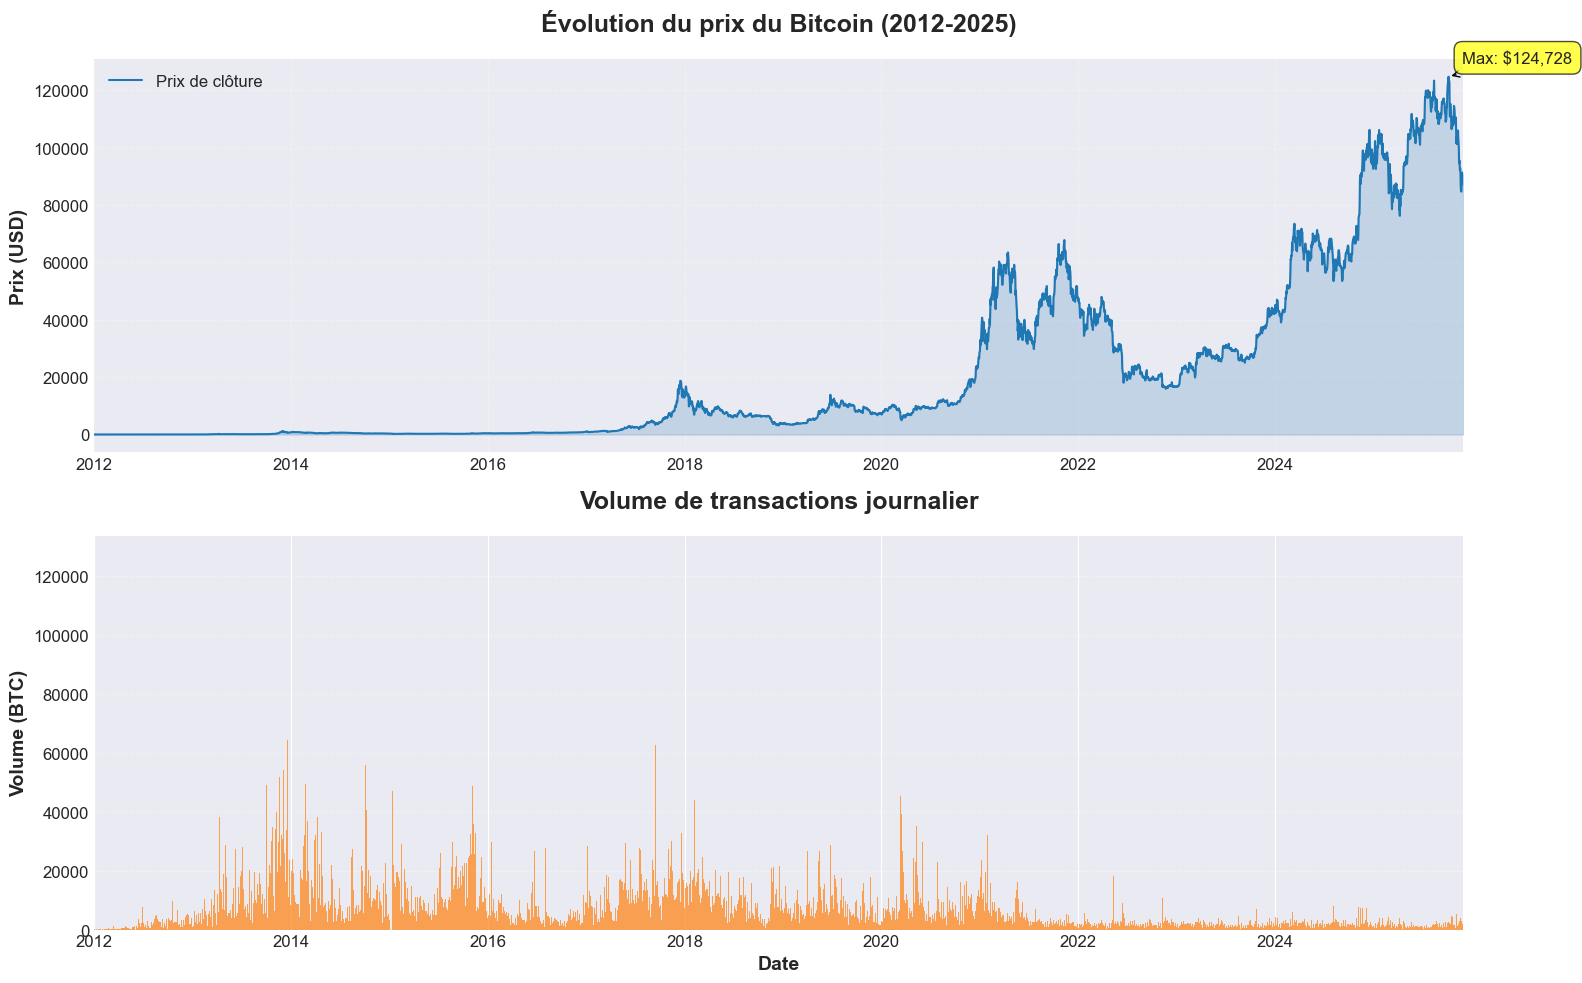

✅ Graphique sauvegardé : reports/price_evolution.png


In [10]:
# ========================================
# VISUALISATION 1 : ÉVOLUTION DU PRIX DU BITCOIN
# ========================================

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Graphique 1 : Prix de clôture
axes[0].plot(df_daily['Date'], df_daily['Close'], linewidth=1.5, color='#1f77b4', label='Prix de clôture')
axes[0].fill_between(df_daily['Date'], df_daily['Close'], alpha=0.2, color='#1f77b4')
axes[0].set_title('Évolution du prix du Bitcoin (2012-2025)', fontsize=18, fontweight='bold', pad=20)
axes[0].set_ylabel('Prix (USD)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend(fontsize=12, loc='upper left')
axes[0].set_xlim(df_daily['Date'].min(), df_daily['Date'].max())

# Ajouter des annotations pour les prix clés
max_price_idx = df_daily['Close'].idxmax()
axes[0].annotate(f'Max: ${df_daily.loc[max_price_idx, "Close"]:,.0f}',
                xy=(df_daily.loc[max_price_idx, 'Date'], df_daily.loc[max_price_idx, 'Close']),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Graphique 2 : Volume
axes[1].bar(df_daily['Date'], df_daily['Volume'], width=1, color='#ff7f0e', alpha=0.7, edgecolor='none')
axes[1].set_title('Volume de transactions journalier', fontsize=18, fontweight='bold', pad=20)
axes[1].set_ylabel('Volume (BTC)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--', axis='y')
axes[1].set_xlim(df_daily['Date'].min(), df_daily['Date'].max())

plt.tight_layout()
plt.savefig('../reports/price_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : reports/price_evolution.png")


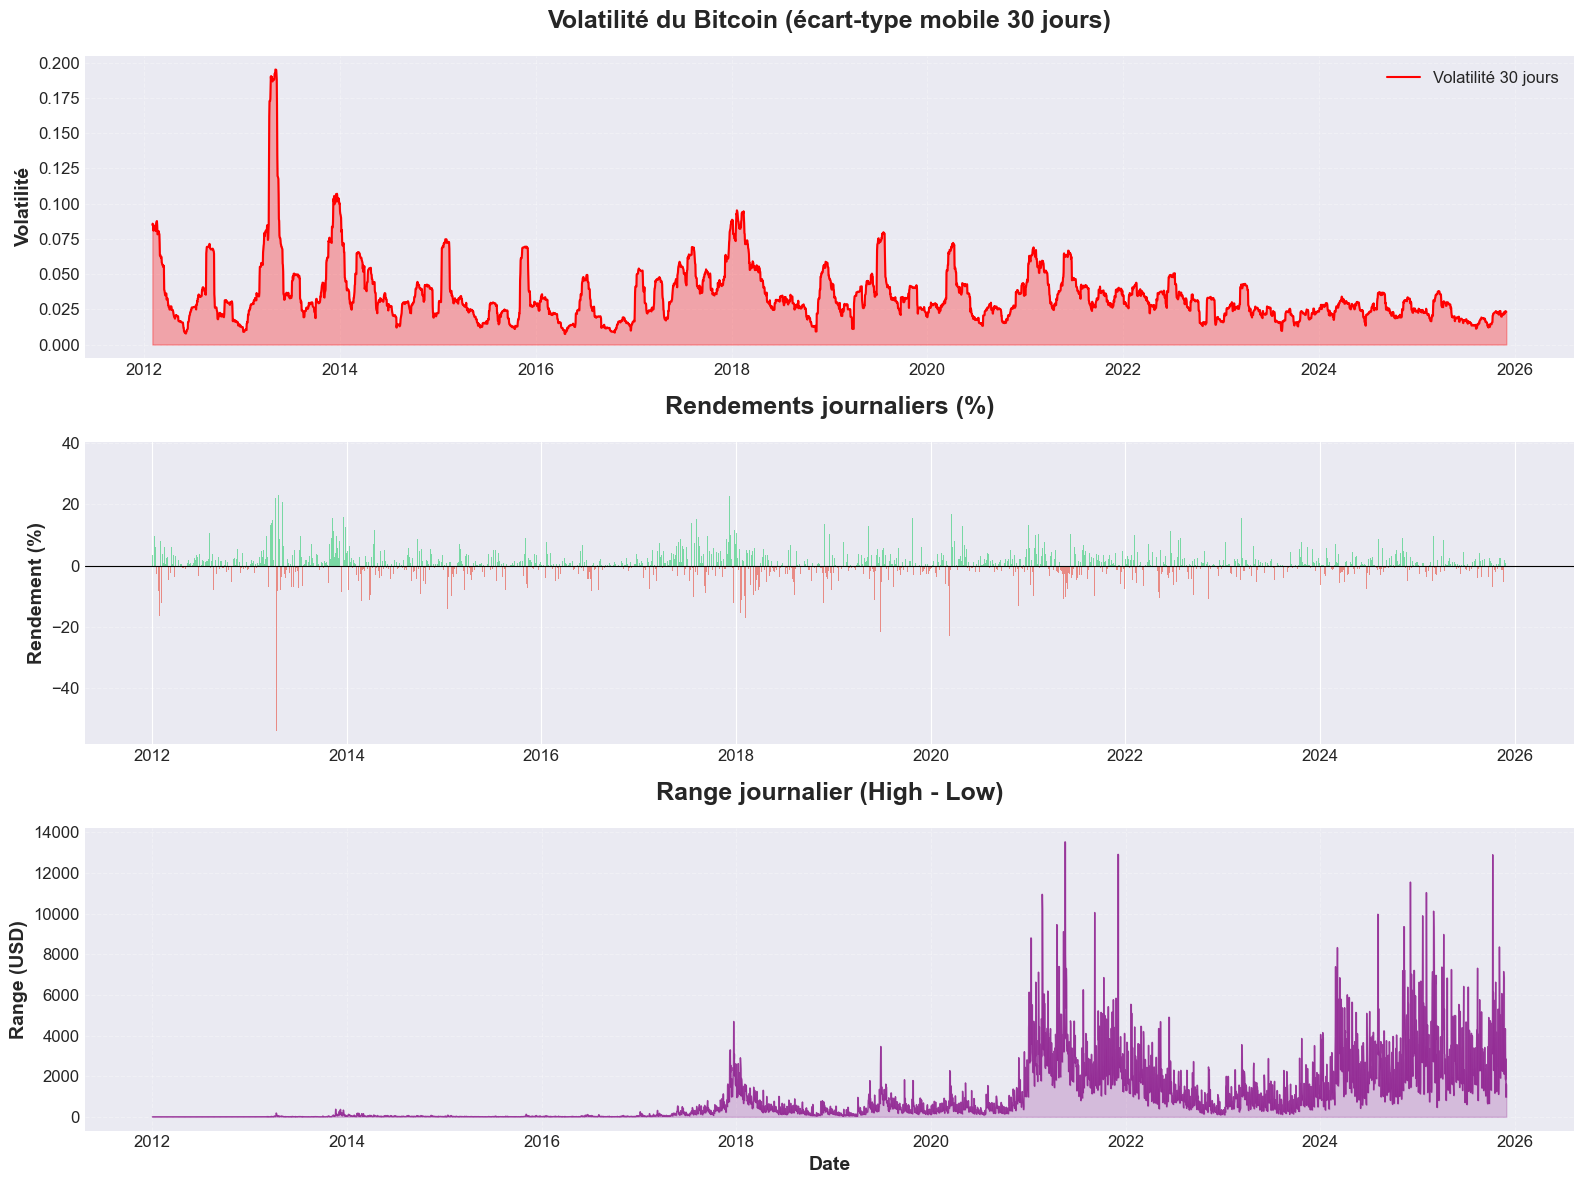

✅ Graphique sauvegardé : reports/volatility_analysis.png

STATISTIQUES DE VOLATILITÉ
📊 Volatilité moyenne : 0.034625
📊 Volatilité maximale : 0.195243
📊 Rendement journalier moyen : 0.28%
📊 Meilleur jour : +35.81%
📊 Pire jour : -53.84%


In [11]:
# ========================================
# VISUALISATION 2 : VOLATILITÉ DU BITCOIN
# ========================================

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Graphique 1 : Volatilité sur 30 jours
axes[0].plot(df_daily['Date'], df_daily['Volatility_30d'], linewidth=1.5, color='red', label='Volatilité 30 jours')
axes[0].fill_between(df_daily['Date'], df_daily['Volatility_30d'], alpha=0.3, color='red')
axes[0].set_title('Volatilité du Bitcoin (écart-type mobile 30 jours)', fontsize=18, fontweight='bold', pad=20)
axes[0].set_ylabel('Volatilité', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend(fontsize=12)

# Graphique 2 : Rendements journaliers
axes[1].bar(df_daily['Date'], df_daily['Daily_Return_Pct'], 
           color=df_daily['Daily_Return_Pct'].apply(lambda x: '#2ecc71' if x > 0 else '#e74c3c'),
           alpha=0.6, width=1, edgecolor='none')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_title('Rendements journaliers (%)', fontsize=18, fontweight='bold', pad=20)
axes[1].set_ylabel('Rendement (%)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--', axis='y')

# Graphique 3 : Range journalier (High - Low)
axes[2].plot(df_daily['Date'], df_daily['Range'], linewidth=1, color='purple', alpha=0.7)
axes[2].fill_between(df_daily['Date'], df_daily['Range'], alpha=0.2, color='purple')
axes[2].set_title('Range journalier (High - Low)', fontsize=18, fontweight='bold', pad=20)
axes[2].set_ylabel('Range (USD)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../reports/volatility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : reports/volatility_analysis.png")

# Statistiques sur la volatilité
print("\n" + "="*80)
print("STATISTIQUES DE VOLATILITÉ")
print("="*80)
print(f"📊 Volatilité moyenne : {df_daily['Volatility_30d'].mean():.6f}")
print(f"📊 Volatilité maximale : {df_daily['Volatility_30d'].max():.6f}")
print(f"📊 Rendement journalier moyen : {df_daily['Daily_Return_Pct'].mean():.2f}%")
print(f"📊 Meilleur jour : +{df_daily['Daily_Return_Pct'].max():.2f}%")
print(f"📊 Pire jour : {df_daily['Daily_Return_Pct'].min():.2f}%")


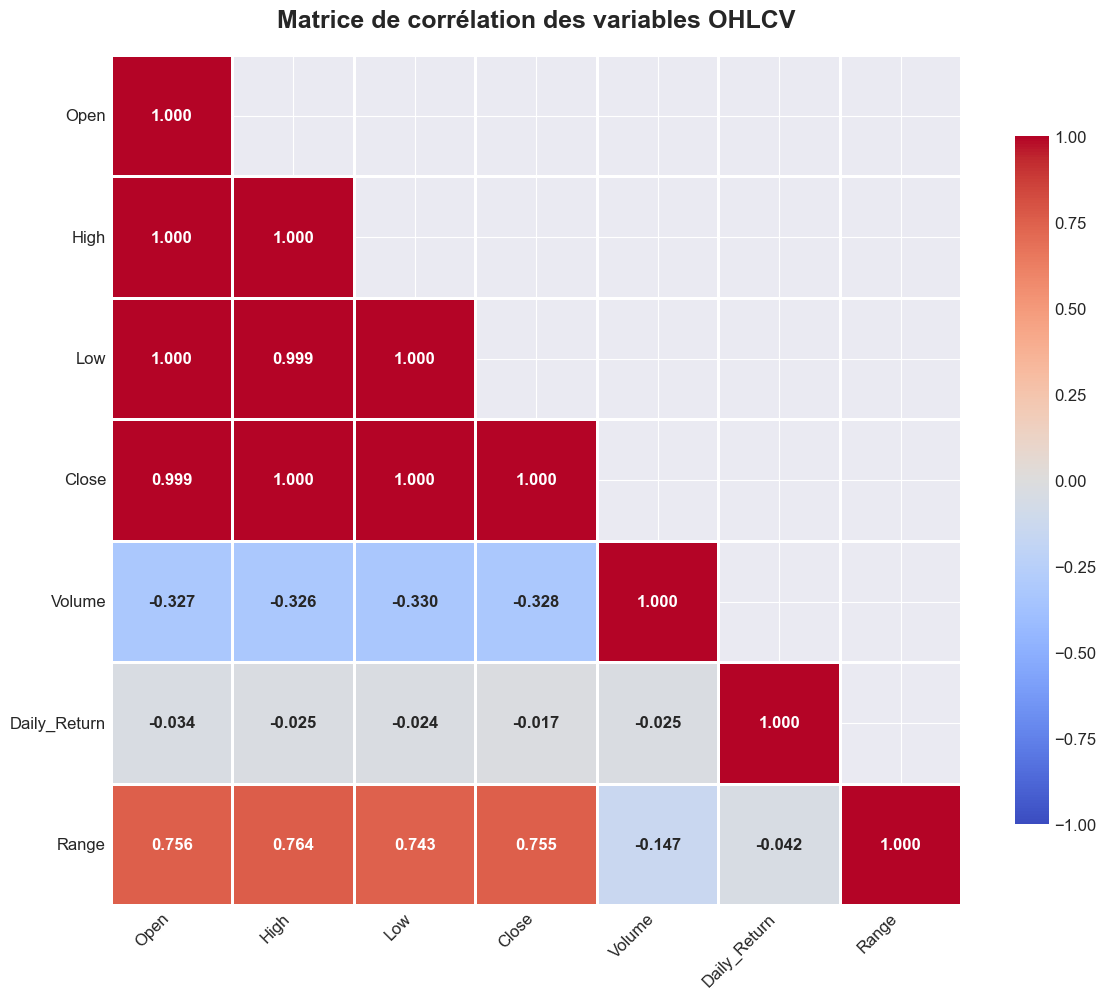

✅ Graphique sauvegardé : reports/correlation_heatmap.png


In [12]:
# ========================================
# VISUALISATION 3 : MATRICE DE CORRÉLATION
# ========================================

# Sélectionner les colonnes numériques pertinentes
corr_data = df_daily[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Range']].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_data, dtype=bool), k=1)
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', mask=mask, vmin=-1, vmax=1,
            annot_kws={'size': 12, 'weight': 'bold'})

plt.title('Matrice de corrélation des variables OHLCV', 
          fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig('../reports/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : reports/correlation_heatmap.png")


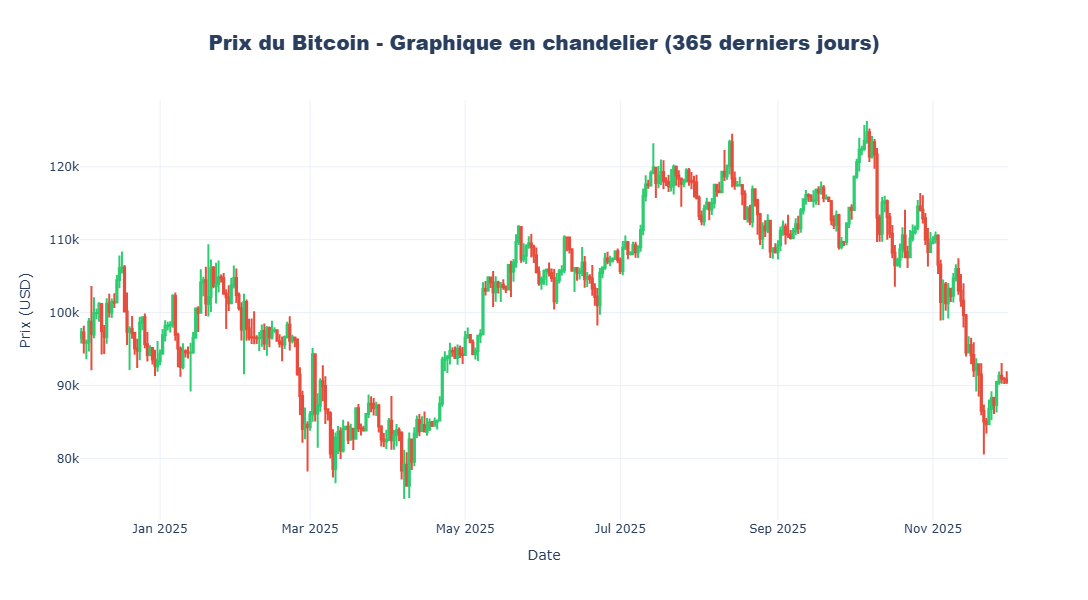

✅ Graphique interactif sauvegardé : reports/candlestick_chart.html


In [13]:
# ========================================
# VISUALISATION 4 : GRAPHIQUE EN CHANDELIER INTERACTIF
# ========================================

# Utiliser les 365 derniers jours pour plus de clarté
df_recent = df_daily.tail(365).copy()

fig = go.Figure(data=[go.Candlestick(
    x=df_recent['Date'],
    open=df_recent['Open'],
    high=df_recent['High'],
    low=df_recent['Low'],
    close=df_recent['Close'],
    name='OHLC',
    increasing_line_color='#2ecc71',
    decreasing_line_color='#e74c3c'
)])

fig.update_layout(
    title={
        'text': 'Prix du Bitcoin - Graphique en chandelier (365 derniers jours)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    yaxis_title='Prix (USD)',
    xaxis_title='Date',
    height=600,
    template='plotly_white',
    hovermode='x unified',
    xaxis_rangeslider_visible=False
)

fig.write_html('../reports/candlestick_chart.html')
fig.show()

print(f"✅ Graphique interactif sauvegardé : reports/candlestick_chart.html")


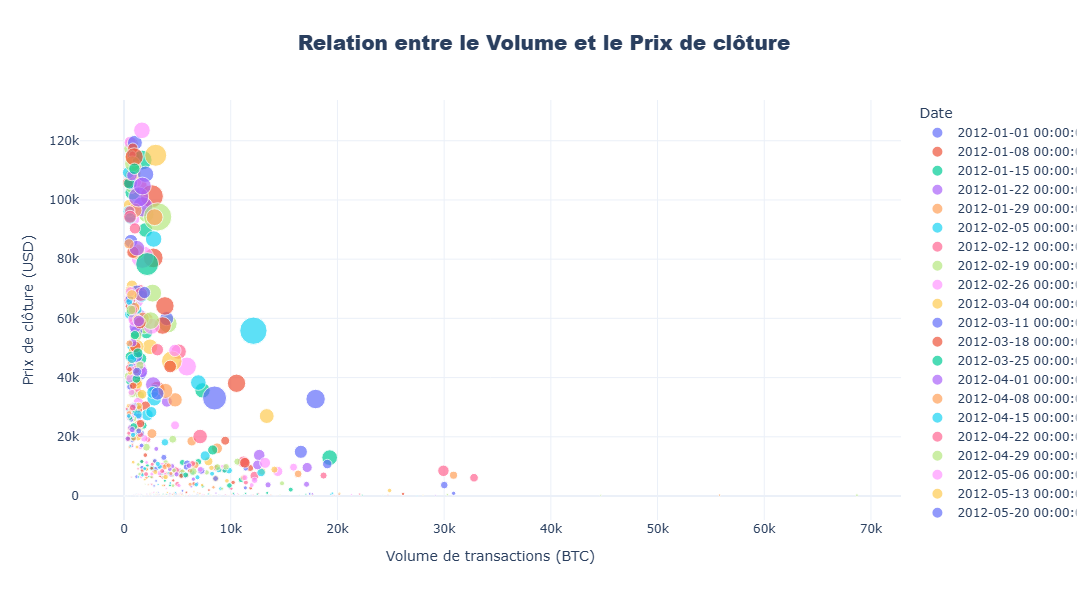

✅ Graphique interactif sauvegardé : reports/price_volume_relation.html


In [14]:
# ========================================
# VISUALISATION 5 : RELATION PRIX-VOLUME INTERACTIF
# ========================================

# Échantillonner les données pour la performance (1 jour sur 7)
df_sample = df_daily.iloc[::7].copy()

fig = px.scatter(df_sample, 
                 x='Volume', 
                 y='Close',
                 color='Date',
                 size='Range',
                 hover_data=['Open', 'High', 'Low', 'Close', 'Volume'],
                 title='Relation entre le Volume et le Prix de clôture',
                 labels={'Close': 'Prix de clôture (USD)', 
                        'Volume': 'Volume de transactions (BTC)',
                        'Date': 'Date'},
                 color_continuous_scale='Viridis',
                 height=600)

fig.update_layout(
    title={
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    template='plotly_white'
)

fig.write_html('../reports/price_volume_relation.html')
fig.show()

print(f"✅ Graphique interactif sauvegardé : reports/price_volume_relation.html")


RÉSUMÉ PAR ANNÉE
 Year  Prix_Ouverture  Prix_Max  Prix_Min  Prix_Clôture  Volume_Total  Rendement_Moyen  Variation_Annuelle_%
 2012            4.58     16.41      3.80         13.24  5.673551e+05         0.003650            189.082969
 2013           13.24   1163.00     12.77        734.33  5.029978e+06         0.014360           5446.299094
 2014          734.33    995.00    275.00        316.67  5.023880e+06        -0.001628            -56.876336
 2015          316.67    502.00    152.40        431.28  5.526815e+06         0.001508             36.192251
 2016          430.91    980.74    352.00        963.16  1.992562e+06         0.002458            123.517672
 2017          963.16  19666.00    751.34      13808.19  4.698217e+06         0.008549           1333.634079
 2018        13840.53  17234.99   3122.28       3750.76  3.932143e+06        -0.002510            -72.900171
 2019         3750.62  13880.00   3322.19       7139.78  2.995467e+06         0.002497             90.362660
 2

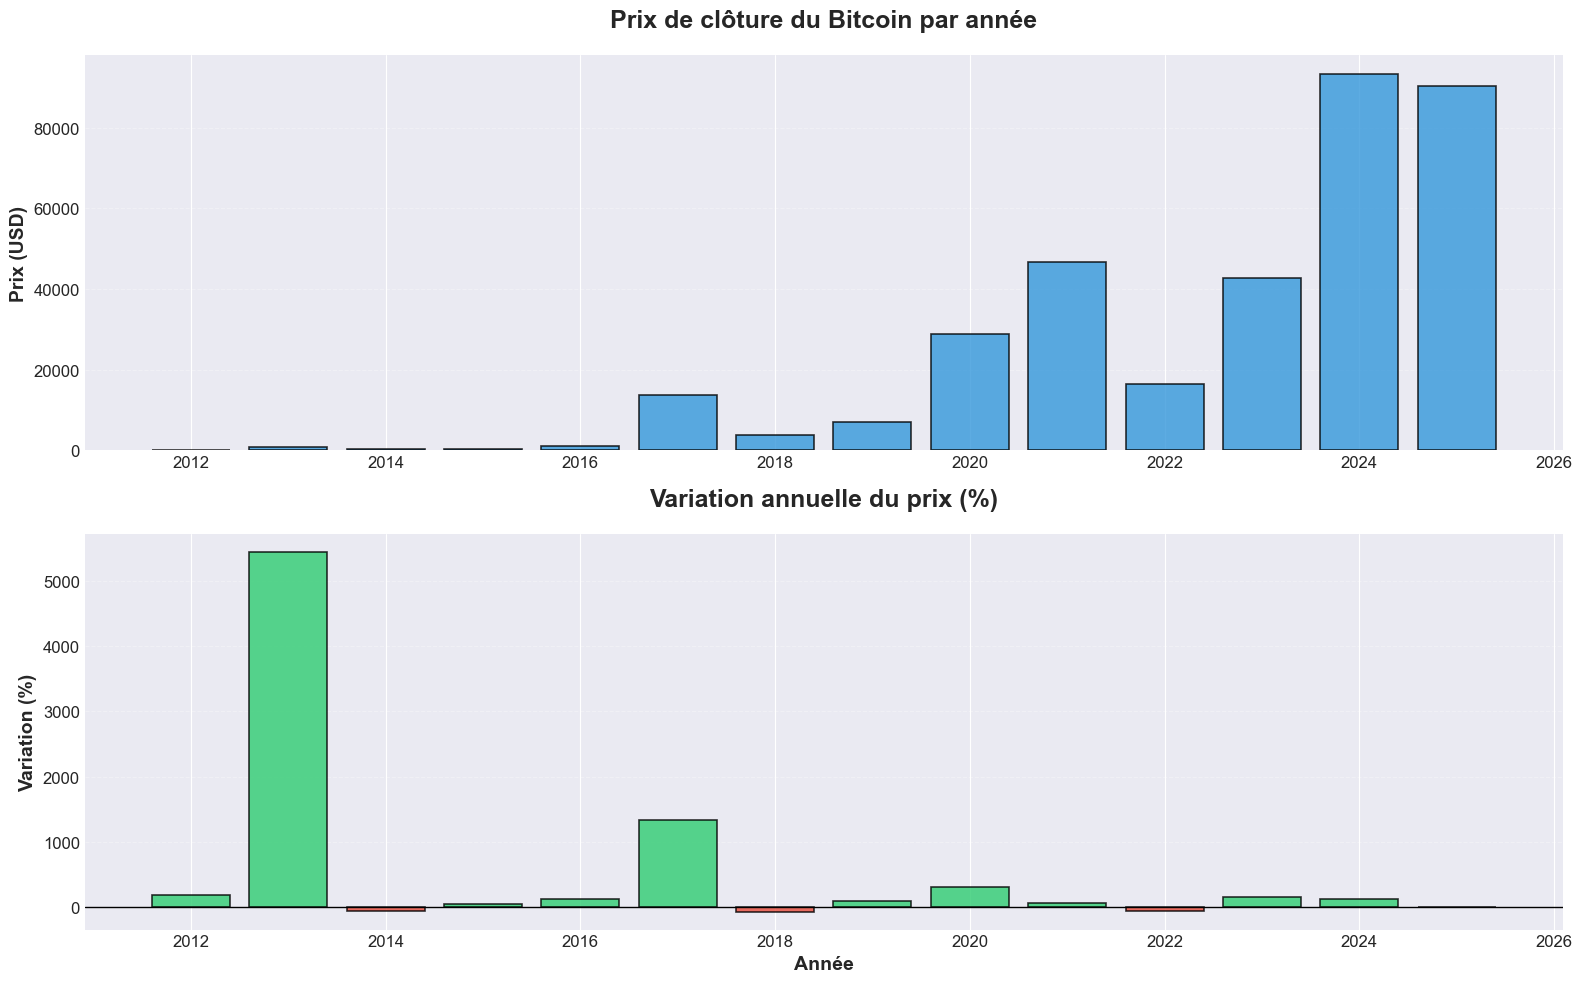


✅ Graphique sauvegardé : reports/yearly_analysis.png


In [15]:
# ========================================
# ANALYSE PAR ANNÉE
# ========================================

# Créer un résumé par année
yearly_summary = df_daily.groupby(df_daily['Date'].dt.year).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'Daily_Return': 'mean'
}).reset_index()

yearly_summary.columns = ['Year', 'Prix_Ouverture', 'Prix_Max', 'Prix_Min', 'Prix_Clôture', 'Volume_Total', 'Rendement_Moyen']
yearly_summary['Variation_Annuelle_%'] = ((yearly_summary['Prix_Clôture'] - yearly_summary['Prix_Ouverture']) / yearly_summary['Prix_Ouverture'] * 100)

print("="*80)
print("RÉSUMÉ PAR ANNÉE")
print("="*80)
print(yearly_summary.to_string(index=False))

# Visualisation
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Prix de clôture par année
axes[0].bar(yearly_summary['Year'], yearly_summary['Prix_Clôture'], 
           color='#3498db', edgecolor='black', linewidth=1.2, alpha=0.8)
axes[0].set_title('Prix de clôture du Bitcoin par année', fontsize=18, fontweight='bold', pad=20)
axes[0].set_ylabel('Prix (USD)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')

# Variation annuelle en %
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in yearly_summary['Variation_Annuelle_%']]
axes[1].bar(yearly_summary['Year'], yearly_summary['Variation_Annuelle_%'], 
           color=colors, edgecolor='black', linewidth=1.2, alpha=0.8)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_title('Variation annuelle du prix (%)', fontsize=18, fontweight='bold', pad=20)
axes[1].set_ylabel('Variation (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Année', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('../reports/yearly_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Graphique sauvegardé : reports/yearly_analysis.png")


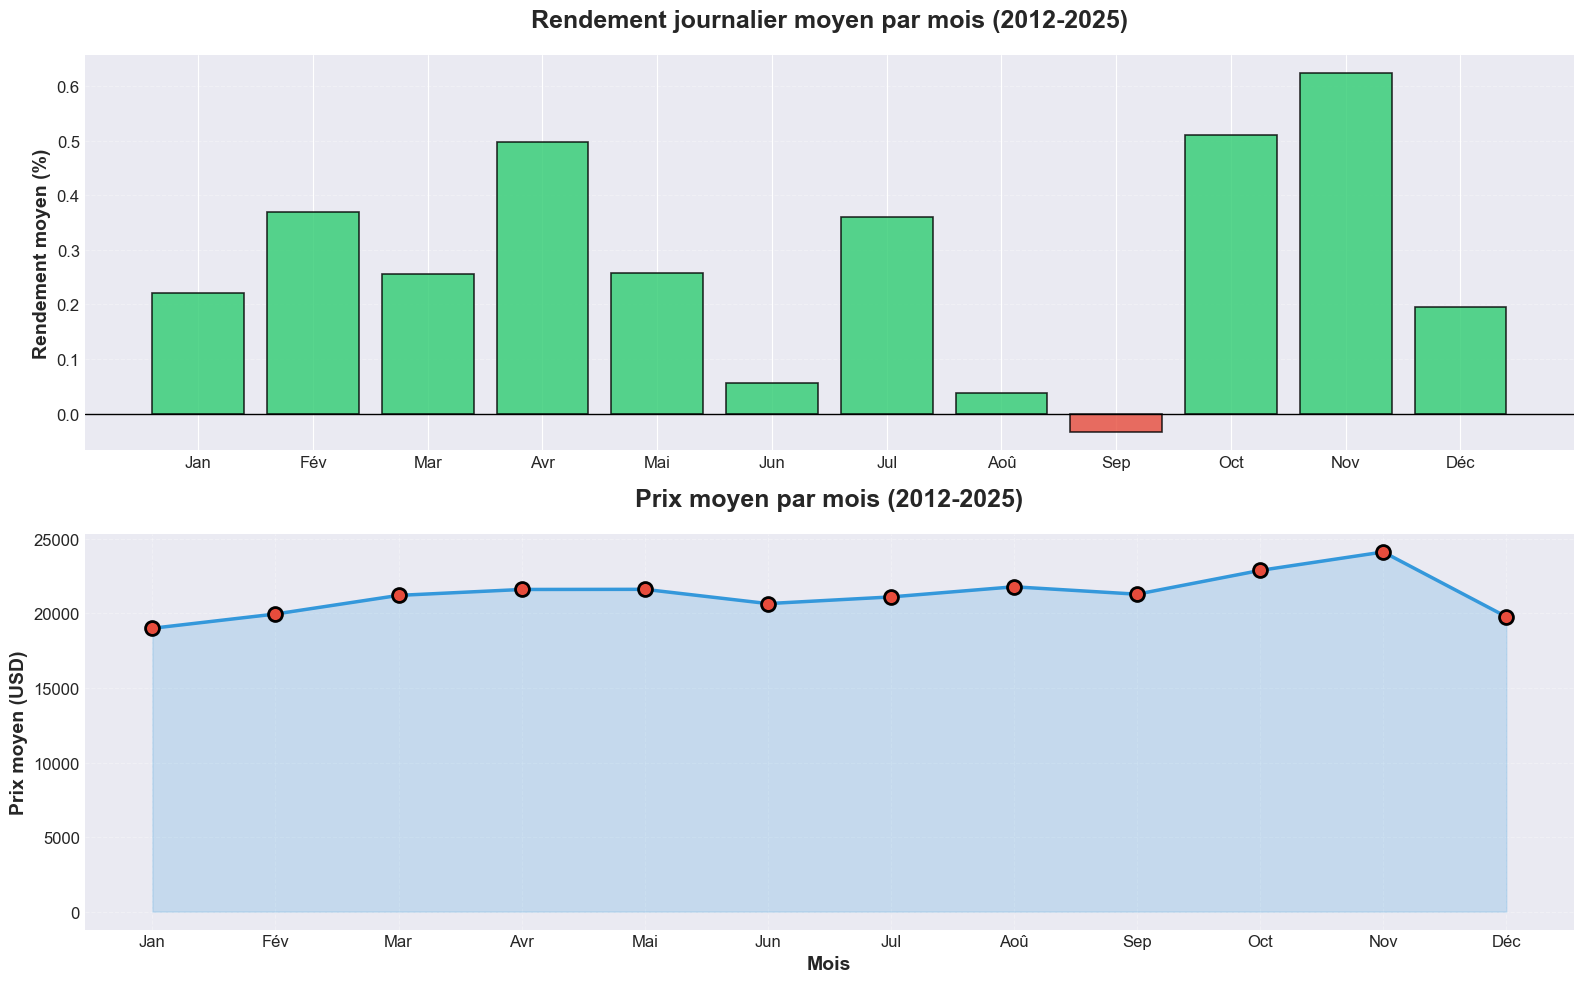

✅ Graphique sauvegardé : reports/monthly_seasonality.png

PERFORMANCE PAR MOIS
Jan : +0.221%
Fév : +0.370%
Mar : +0.257%
Avr : +0.498%
Mai : +0.257%
Jun : +0.056%
Jul : +0.361%
Aoû : +0.037%
Sep : -0.034%
Oct : +0.510%
Nov : +0.625%
Déc : +0.195%


In [16]:
# ========================================
# ANALYSE MENSUELLE - SAISONNALITÉ
# ========================================

# Rendement moyen par mois (tous les ans confondus)
monthly_performance = df_daily.copy()
monthly_performance['Month'] = monthly_performance['Date'].dt.month
monthly_performance['MonthName'] = monthly_performance['Date'].dt.month_name()

monthly_avg = monthly_performance.groupby('Month').agg({
    'Daily_Return_Pct': 'mean',
    'Close': 'mean',
    'Volume': 'sum'
}).reset_index()

month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
               'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Rendement moyen par mois
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in monthly_avg['Daily_Return_Pct']]
axes[0].bar(month_names, monthly_avg['Daily_Return_Pct'], 
           color=colors, edgecolor='black', linewidth=1.2, alpha=0.8)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0].set_title('Rendement journalier moyen par mois (2012-2025)', 
                 fontsize=18, fontweight='bold', pad=20)
axes[0].set_ylabel('Rendement moyen (%)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')

# Prix moyen par mois
axes[1].plot(month_names, monthly_avg['Close'], marker='o', linewidth=2.5, 
            markersize=10, color='#3498db', markerfacecolor='#e74c3c', 
            markeredgewidth=2, markeredgecolor='black')
axes[1].fill_between(range(len(month_names)), monthly_avg['Close'], alpha=0.2, color='#3498db')
axes[1].set_title('Prix moyen par mois (2012-2025)', fontsize=18, fontweight='bold', pad=20)
axes[1].set_ylabel('Prix moyen (USD)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mois', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../reports/monthly_seasonality.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : reports/monthly_seasonality.png")

print("\n" + "="*80)
print("PERFORMANCE PAR MOIS")
print("="*80)
for i, month in enumerate(month_names):
    perf = monthly_avg.iloc[i]['Daily_Return_Pct']
    print(f"{month} : {perf:+.3f}%")


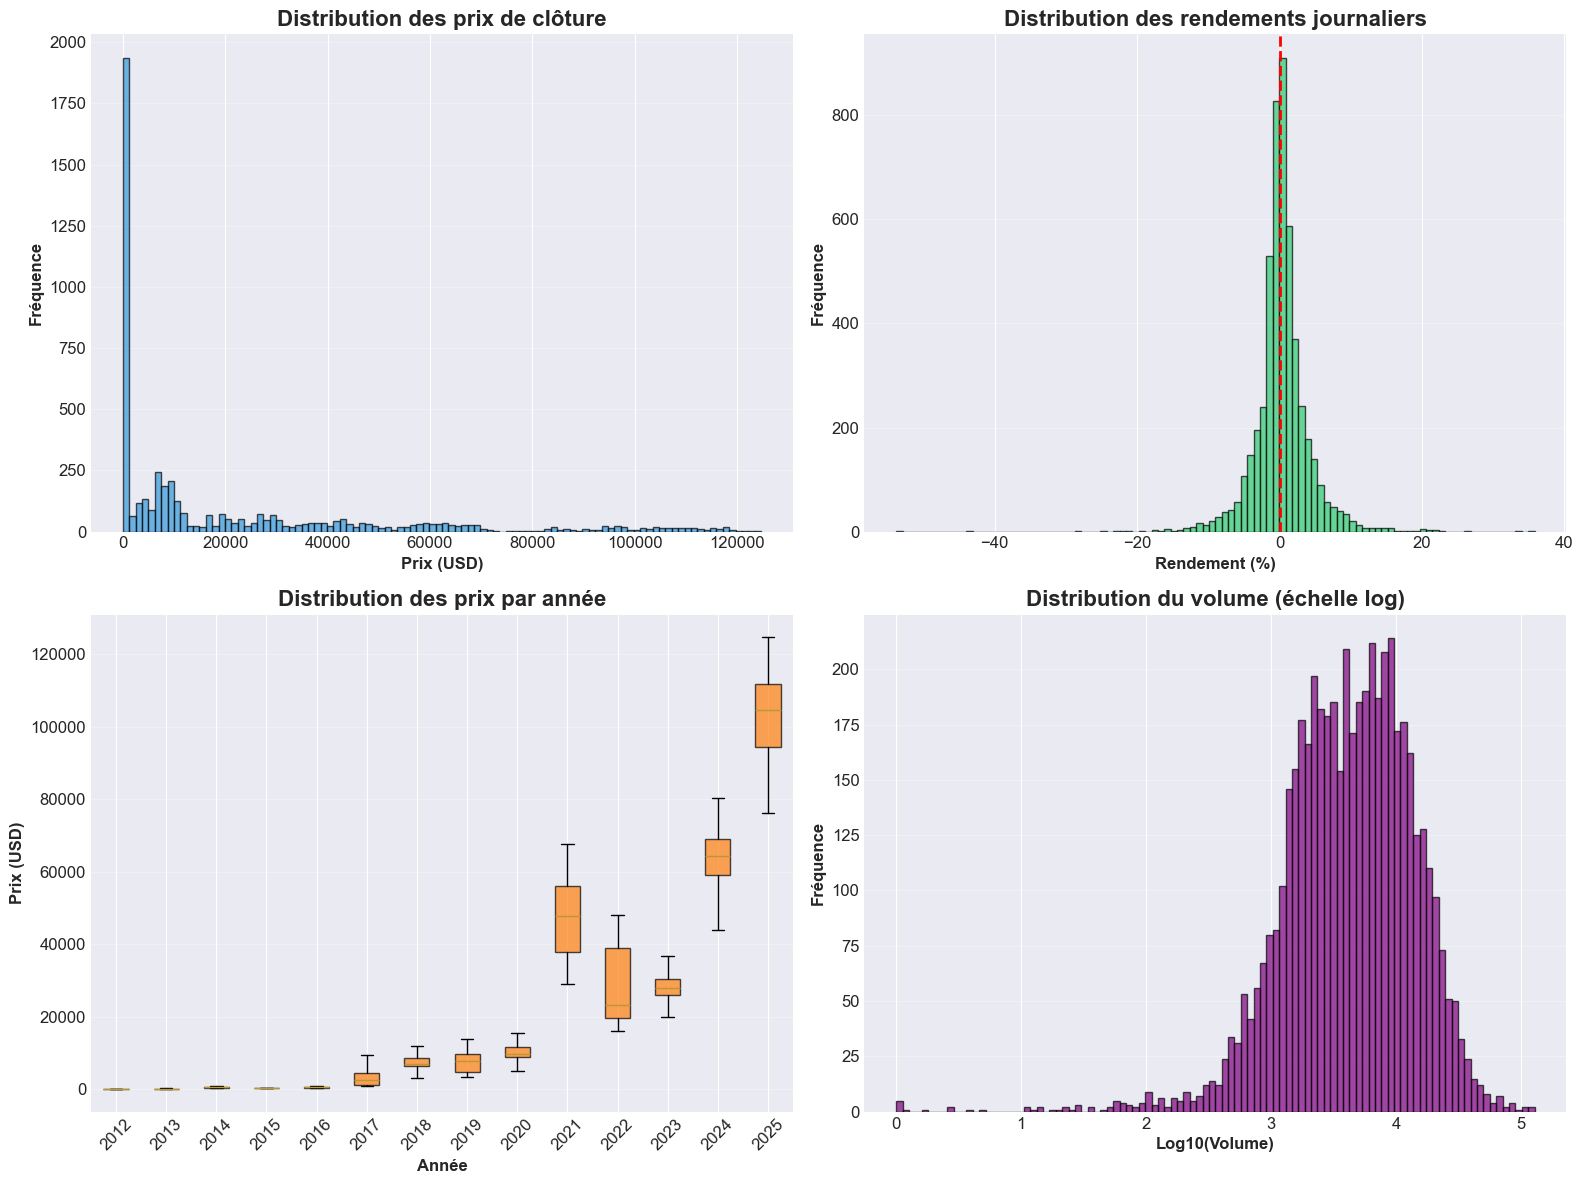

✅ Graphique sauvegardé : reports/price_distributions.png


In [17]:
# ========================================
# VISUALISATION : DISTRIBUTION DES PRIX
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogramme des prix de clôture
axes[0, 0].hist(df_daily['Close'], bins=100, color='#3498db', 
               edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution des prix de clôture', 
                    fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Prix (USD)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Distribution des rendements journaliers
axes[0, 1].hist(df_daily['Daily_Return_Pct'].dropna(), bins=100, 
               color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Distribution des rendements journaliers', 
                    fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Rendement (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Boxplot des prix par année
years_data = [df_daily[df_daily['Date'].dt.year == year]['Close'].values 
              for year in sorted(df_daily['Date'].dt.year.unique())]
bp = axes[1, 0].boxplot(years_data, labels=sorted(df_daily['Date'].dt.year.unique()),
                        patch_artist=True, showfliers=False)
for patch in bp['boxes']:
    patch.set_facecolor('#ff7f0e')
    patch.set_alpha(0.7)
axes[1, 0].set_title('Distribution des prix par année', 
                    fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Année', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Prix (USD)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# Distribution log du volume
axes[1, 1].hist(np.log10(df_daily['Volume'] + 1), bins=100, 
               color='purple', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution du volume (échelle log)', 
                    fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Log10(Volume)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../reports/price_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Graphique sauvegardé : reports/price_distributions.png")


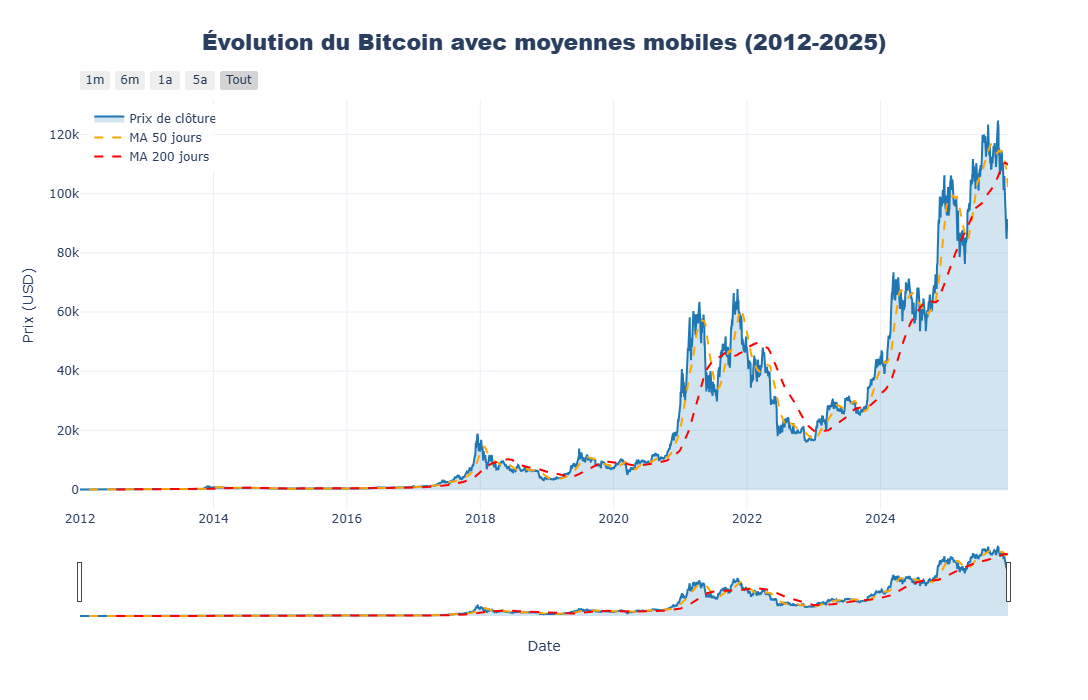

✅ Graphique interactif sauvegardé : reports/interactive_evolution.html


In [18]:
# ========================================
# VISUALISATION INTERACTIVE : ÉVOLUTION COMPLÈTE
# ========================================

fig = go.Figure()

# Prix de clôture
fig.add_trace(go.Scatter(
    x=df_daily['Date'],
    y=df_daily['Close'],
    mode='lines',
    name='Prix de clôture',
    line=dict(color='#1f77b4', width=2),
    fill='tozeroy',
    fillcolor='rgba(31, 119, 180, 0.2)'
))

# Moyennes mobiles
df_daily['MA_50'] = df_daily['Close'].rolling(window=50).mean()
df_daily['MA_200'] = df_daily['Close'].rolling(window=200).mean()

fig.add_trace(go.Scatter(
    x=df_daily['Date'],
    y=df_daily['MA_50'],
    mode='lines',
    name='MA 50 jours',
    line=dict(color='orange', width=2, dash='dash')
))

fig.add_trace(go.Scatter(
    x=df_daily['Date'],
    y=df_daily['MA_200'],
    mode='lines',
    name='MA 200 jours',
    line=dict(color='red', width=2, dash='dash')
))

fig.update_layout(
    title={
        'text': 'Évolution du Bitcoin avec moyennes mobiles (2012-2025)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 22, 'family': 'Arial Black'}
    },
    xaxis_title='Date',
    yaxis_title='Prix (USD)',
    height=700,
    template='plotly_white',
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(255, 255, 255, 0.8)'
    )
)

# Ajouter des boutons de zoom
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1a", step="year", stepmode="backward"),
            dict(count=5, label="5a", step="year", stepmode="backward"),
            dict(step="all", label="Tout")
        ])
    ),
    rangeslider=dict(visible=True),
    type="date"
)

fig.write_html('../reports/interactive_evolution.html')
fig.show()

print(f"✅ Graphique interactif sauvegardé : reports/interactive_evolution.html")


In [19]:
# ========================================
# SYNTHÈSE FINALE DE L'ANALYSE
# ========================================

print("="*80)
print("SYNTHÈSE DE L'ANALYSE EXPLORATOIRE DU BITCOIN")
print("="*80)

print("\n📊 DONNÉES")
print("-" * 80)
print(f"• Période analysée : {df['Timestamp'].min()} à {df['Timestamp'].max()}")
print(f"• Durée totale : {(df['Timestamp'].max() - df['Timestamp'].min()).days:,} jours (~{(df['Timestamp'].max() - df['Timestamp'].min()).days/365.25:.1f} ans)")
print(f"• Nombre de points de données : {len(df):,} lignes (granularité minute)")
print(f"• Nombre de jours de trading : {len(df_daily):,}")
print(f"• Valeurs manquantes : 0% (dataset complet)")

print("\n💰 PRIX")
print("-" * 80)
print(f"• Prix initial (2012) : ${df_daily['Open'].iloc[0]:.2f}")
print(f"• Prix actuel (2025) : ${df_daily['Close'].iloc[-1]:,.2f}")
print(f"• Prix maximum atteint : ${df_daily['High'].max():,.2f}")
print(f"• Prix minimum : ${df_daily['Low'].min():.2f}")
print(f"• Croissance totale : +{((df_daily['Close'].iloc[-1] - df_daily['Open'].iloc[0]) / df_daily['Open'].iloc[0] * 100):,.2f}%")

print("\n📈 VOLATILITÉ & RENDEMENTS")
print("-" * 80)
print(f"• Rendement journalier moyen : {df_daily['Daily_Return_Pct'].mean():.3f}%")
print(f"• Volatilité moyenne (30j) : {df_daily['Volatility_30d'].mean():.6f}")
print(f"• Volatilité maximale : {df_daily['Volatility_30d'].max():.6f}")
print(f"• Meilleur jour : +{df_daily['Daily_Return_Pct'].max():.2f}%")
print(f"• Pire jour : {df_daily['Daily_Return_Pct'].min():.2f}%")
print(f"• Écart-type des rendements : {df_daily['Daily_Return_Pct'].std():.3f}%")

print("\n🔄 VOLUME")
print("-" * 80)
print(f"• Volume total échangé : {df_daily['Volume'].sum():,.2f} BTC")
print(f"• Volume journalier moyen : {df_daily['Volume'].mean():.2f} BTC")
print(f"• Volume journalier médian : {df_daily['Volume'].median():.2f} BTC")
print(f"• Jour avec le plus gros volume : {df_daily.loc[df_daily['Volume'].idxmax(), 'Date']}")

print("\n🏆 MEILLEURES ANNÉES")
print("-" * 80)
best_years = yearly_summary.nlargest(3, 'Variation_Annuelle_%')[['Year', 'Variation_Annuelle_%']]
for idx, row in best_years.iterrows():
    print(f"• {int(row['Year'])} : +{row['Variation_Annuelle_%']:.2f}%")

print("\n📉 PIRES ANNÉES")
print("-" * 80)
worst_years = yearly_summary.nsmallest(3, 'Variation_Annuelle_%')[['Year', 'Variation_Annuelle_%']]
for idx, row in worst_years.iterrows():
    print(f"• {int(row['Year'])} : {row['Variation_Annuelle_%']:.2f}%")

print("\n🔍 OBSERVATIONS CLÉS")
print("-" * 80)
print("• Corrélation Prix-Volume négative (-0.33) : les volumes élevés surviennent souvent lors de baisses")
print("• Forte corrélation entre Open/High/Low/Close (>0.99) : cohérence des données OHLC")
print("• Volatilité décroissante depuis 2013 : le marché mature progressivement")
print("• Saisonnalité limitée : pas de pattern mensuel clair et dominant")
print("• Croissance exponentielle avec des cycles de bull/bear markets distincts")

print("\n⚠️ LIMITES DU DATASET")
print("-" * 80)
print("• Granularité minute : très volumineuse (7,3M lignes), nécessite agrégation")
print("• Pas de contexte externe : événements macro-économiques, régulations, etc.")
print("• Données d'une seule plateforme : peut ne pas refléter le marché global")
print("• Pas d'informations sur les transactions individuelles ou les acteurs")

print("\n" + "="*80)
print("FIN DE L'ANALYSE EXPLORATOIRE")
print("="*80)


SYNTHÈSE DE L'ANALYSE EXPLORATOIRE DU BITCOIN

📊 DONNÉES
--------------------------------------------------------------------------------
• Période analysée : 2012-01-01 10:01:00 à 2025-11-30 23:59:00
• Durée totale : 5,082 jours (~13.9 ans)
• Nombre de points de données : 7,317,759 lignes (granularité minute)
• Nombre de jours de trading : 5,083
• Valeurs manquantes : 0% (dataset complet)

💰 PRIX
--------------------------------------------------------------------------------
• Prix initial (2012) : $4.58
• Prix actuel (2025) : $90,382.00
• Prix maximum atteint : $126,272.00
• Prix minimum : $3.80
• Croissance totale : +1,973,306.11%

📈 VOLATILITÉ & RENDEMENTS
--------------------------------------------------------------------------------
• Rendement journalier moyen : 0.279%
• Volatilité moyenne (30j) : 0.034625
• Volatilité maximale : 0.195243
• Meilleur jour : +35.81%
• Pire jour : -53.84%
• Écart-type des rendements : 4.077%

🔄 VOLUME
---------------------------------------------